In [30]:
# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#前処理したデータを読み込み
#train = pd.read_csv('edited_train.csv').drop(["SOR"],axis = 1)
train = pd.read_csv('edited_train.csv').drop(["id","logy", "year", 'hokkaido','kansai', 'disconfort', 'kantou', 'temperature', 'humidity',  'kyusyu','shikoku', 'tohoku', 'tyubu', 'tyugoku','stadium',"home area","away area"],axis = 1)
test = pd.read_csv('edited_test.csv')
#data1.head(10)

In [65]:
top6_index=train.corr()['y'].abs().nlargest(15).index 
top6_index[1:]

Index(['capa', 'total_p_score', 'stage', 'distance(min)', 'home rank',
       'area rank', 'rerative distance', 'away rank', 'holiday', 'month',
       'weather rank', 'match day'],
      dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#X = train.loc[:,top6_index[1:]]
X = train.drop(["y","month"],axis=1)
#X = train.loc[:,['capa', 'stage', 'total_p_score', 'distance(min)','home rank', 'rerative distance',"holiday","weather rank"]]
#X = train.drop(["y","SOR","home area","away area"],axis = 1)

y = train.loc[:,["y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 130)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=200)
rfc_1.fit(X_train, y_train)

/Users/itarou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:

np.save('eature_importances_.npy',rfc_1.feature_importances_)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=1000)
rfc_2.fit(X_train, y_train)

/Users/itarou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Unknown label type: 'continuous'

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(X_train, y_train)

/Users/itarou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

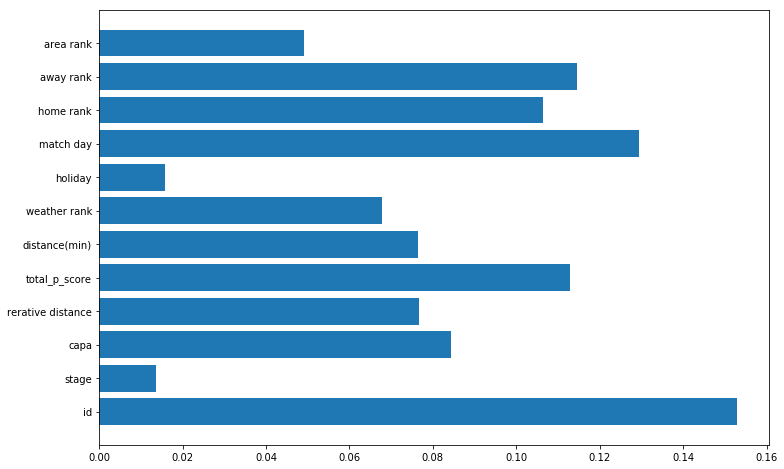

In [63]:
# 特徴量の重要度をグラフに出力
n_features = len(X_train.columns)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc_1.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.show()


In [62]:
# 特徴量の重要度をグラフに出力
n_features = len(X_train.columns)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), gbct.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.show()

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

<Figure size 864x576 with 0 Axes>

In [12]:
rfc_2.feature_importances_

array([0.03582174, 0.01254751, 0.05184484, 0.00264247, 0.00404723,
       0.01049946, 0.00715986, 0.00345862, 0.00429376, 0.00929853,
       0.00605028, 0.05255306, 0.09072561, 0.09218226, 0.07596939,
       0.04328424, 0.04463598, 0.05187021, 0.01219067, 0.0942865 ,
       0.08004481, 0.07164486, 0.07727032, 0.04505908, 0.0206187 ])

In [16]:
rfc_2.predict(X_train)

array([26514, 30504,  9237, ...,  3466,  7607, 30481])

In [68]:
from sklearn.metrics import mean_squared_error as mse
print('train RMSE:%.3f'%(mse(y_train, rfc_2.predict(X_train)) ** (1/2)))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [69]:
from sklearn.metrics import mean_squared_error as mse
print('test RMSE:%.3f'%(mse(y_test, rfc_1.predict(X_test)) ** (1/2)))

test RMSE:4855.906
